<a href="https://colab.research.google.com/github/mirsazzathossain/CSE317-Lab/blob/autumn_2022/Lab_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Polynomial Regression**

In this assignment, you will implement polynomial regression and apply it to the [Assignment 4 Dataset](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/mirsazzathossain/CSE317-Lab-Numerical-Methods/blob/main/datasets/data.csv).

The dataset contains two columns, the first column is the feature and the second column is the label. The goal is find the best fit line for the data.

You will need to perform the following regression tasks and find the best one for the dataset.

1.    **Linear Regression:**

     The equation we are trying to fit is:
     $$y = \theta_0 + \theta_1 x$$
     where $x$ is the feature and $y$ is the label.

     We can rewrite the equation in vector form as:
$$Y = X\theta$$ where $X$ is a matrix with two columns, the first column is all 1s and the second column is the feature, and $Y$ is a vector with the labels. $\theta$ is a vector with two elements, $\theta_0$ and $\theta_1$. The $X$ matrix will look like this:
$$X = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix}$$
2. **Quadratic Regression:**

     The equation we are trying to fit is:
     $$y = \theta_0 + \theta_1 x + \theta_2 x^2$$
     where $x$ is the feature and $y$ is the label.

     We can rewrite the equation in vector form as:
$$Y = X\theta$$where $X$ is a matrix with three columns, the first column is all 1s, the second column is the feature, and the third column is the feature squared, and $Y$ is a vector with the labels. $\theta$ is a vector with three elements, $\theta_0$, $\theta_1$, and $\theta_2$. The $X$ matrix will look like this:

$$X = \begin{bmatrix} 1 & x_1 & x_1^2 \\ 1 & x_2 & x_2^2 \\ \vdots & \vdots & \vdots \\ 1 & x_n & x_n^2 \end{bmatrix}$$
3. **Cubic Regression:**

     The equation we are trying to fit is:
$$y = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3$$
     where $x$ is the feature and $y$ is the label.

     We can rewrite the equation in vector form as:
$$Y = X\theta$$where $X$ is a matrix with four columns, the first column is all 1s, the second column is the feature, the third column is the feature squared, and the fourth column is the feature cubed, and $Y$ is a vector with the labels. $\theta$ is a vector with four elements, $\theta_0$, $\theta_1$, $\theta_2$, and $\theta_3$. The $X$ matrix will look like this:
$$X = \begin{bmatrix} 1 & x_1 & x_1^2 & x_1^3 \\ 1 & x_2 & x_2^2 & x_2^3 \\ \vdots & \vdots & \vdots & \vdots \\ 1 & x_n & x_n^2 & x_n^3 \end{bmatrix}$$

Take 15 data points from the dataset and use them as the training set. Use the remaining data points as the test set. For each regression task, find the best $\theta$ vector using the training set. Then, calculate the mean squared error (MSE) on the test set. Plot the training set, the test set (in a different color), and the best fit line for each regression task. Which regression task gives the best fit line? Which regression task gives the lowest MSE on the test set? Report your answers in a Markdown cell.

**Note:** Do not use any built-in functions like `np.polyfit` or `sklearn.linear_model.LinearRegression` or any other built-in functions that perform polynomial regression. You must implement the regression tasks yourself.

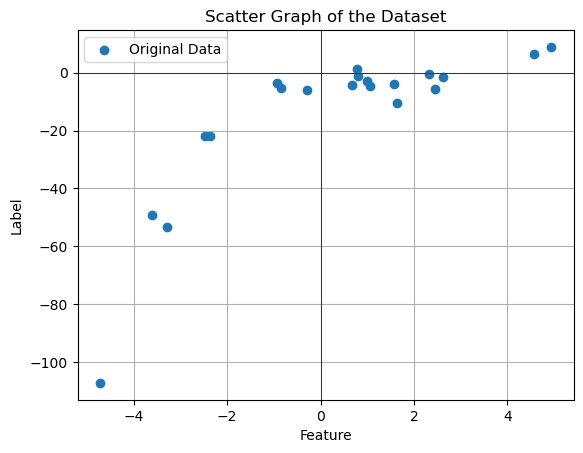

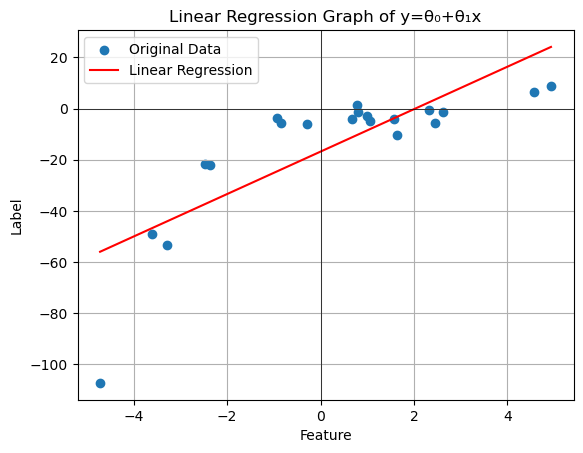

Theta values:
θ₀: -16.79645048448471
θ₁: 8.292387313549636


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# prepare dataset
data = pd.read_csv('data.csv', header=None, names=['feature', 'label'])
x = data.iloc[:, 0].values
y = data.iloc[:, 1].values
x, y = zip(*sorted(zip(x,y))) # sort data keeping its corresponding data same
x = np.array(x)
y = np.array(y)

# original data plot
plt.scatter(x, y, label='Original Data')
plt.xlabel('Feature')
plt.ylabel('Label')
plt.title('Scatter Graph of the Dataset')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()

# 1) linear regression

# x matrix
x_matrix_linear = np.column_stack((np.ones_like(x), x))


# find theta using the normal equation θ = (X ′ X)⁻¹ X ′ y
theta_linear = np.linalg.inv(x_matrix_linear.T @ x_matrix_linear) @ x_matrix_linear.T @ y

# vector form equation Y = Xθ
y_linear = x_matrix_linear @ theta_linear

# plotting the linear regression model
plt.scatter(x, y, label='Original Data')
plt.plot(x, y_linear, color='red', label='Linear Regression')
plt.xlabel('Feature')
plt.ylabel('Label')
plt.title('Linear Regression Graph of y=θ₀+θ₁x')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()

print("Theta values:")
print("θ₀:", theta_linear[0])
print("θ₁:", theta_linear[1])


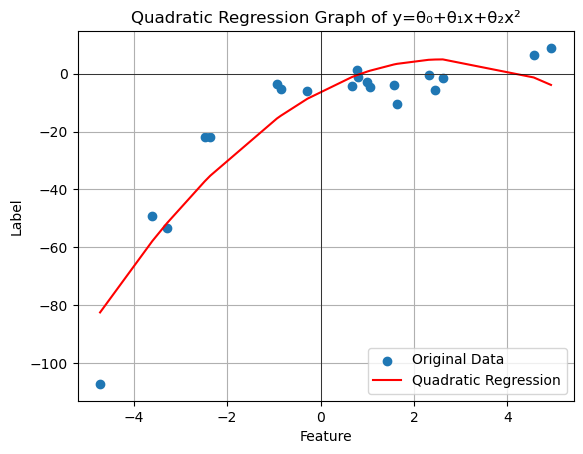

Theta values:
θ₀: -6.119739262617226
θ₁: 8.484926494693328
θ₂: -1.62853125464724


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 2) quadratic regression

# X matrix
x_matrix_quad = np.column_stack((np.ones_like(x), x, x**2))

"""
    using curve fitting method derived from linear least square method to get 3 equations 
    to solve the quadratic equation and find its coefficients https://skill-lync.com/student-projects/Linear-and-Cubic-curve-fitting-39329
    
    set of equations:
    Σy = na + bΣx + cΣx²
    Σxy = aΣx + bΣx² + cΣx³
    Σx²y = aΣx² + bΣx³ + cΣx⁴
    where a = θ₀, b = θ₁ and c = θ₂ are all coefficients
"""
def solve_quad_eqn(x_val,y_val):
    # calculate values to solve equations
    x_sq = x_val**2
    x_cube = x_val**3
    x_quad = x_val**4
    x_sq_y = x_sq*y_val
    x_mul_y = x_val*y_val

    left_eqn_matrix = np.array([
        [len(x_val), np.sum(x_val), np.sum(x_sq)],      # na + bΣx + cΣx²
        [np.sum(x_val), np.sum(x_sq), np.sum(x_cube)],  # Σxy = aΣx + bΣx² + cΣx³
        [np.sum(x_sq), np.sum(x_cube), np.sum(x_quad)]  # Σx²y = aΣx² + bΣx³ + cΣx⁴
    ])
    
                                # Σy                Σxy             Σx²y
    right_eqn_matrix = np.array([np.sum(y_val), np.sum(x_mul_y), np.sum(x_sq_y)])

    #return theta values by solving the set of equations
    return np.linalg.solve(left_eqn_matrix, right_eqn_matrix)


theta_quad = solve_quad_eqn(x, y)

# vector form equation Y = Xθ
y_quad = x_matrix_quad @ theta_quad



# plotting the quadratic regression model
plt.scatter(x, y, label='Original Data')
plt.plot(x, y_quad, color='red', label='Quadratic Regression')
plt.xlabel('Feature')
plt.ylabel('Label')
plt.title('Quadratic Regression Graph of y=θ₀+θ₁x+θ₂x²')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()

print("Theta values:")
print("θ₀:", theta_quad[0])
print("θ₁:", theta_quad[1])
print("θ₂:", theta_quad[2])


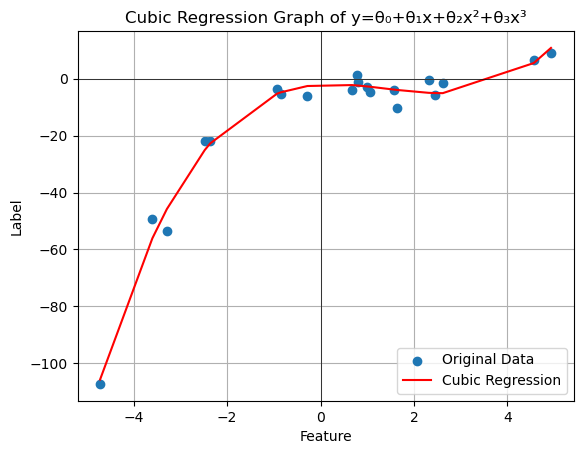

Theta values:
θ₀: -2.1315998415308592
θ₁: 0.9914150119650516
θ₂: -2.1033009422408186
θ₃: 0.49338028544309387


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 3) cubic regression
# 3) cubic regression

# X matrix
x_matrix_cube = np.column_stack((np.ones_like(x), x, x**2, x**3))


"""
    using curve fitting method derived from linear least square method to get 4 equations 
    to solve the cubic equation and find its coefficients https://skill-lync.com/student-projects/Linear-and-Cubic-curve-fitting-39329
    
    set of equations:
    Σy = na + bΣx + cΣx² + dΣx³
    Σxy = aΣx + bΣx² + cΣx³ + dΣx⁴
    Σx²y = aΣx² + bΣx³ + cΣx⁴ + dΣx⁵
    Σx³y = aΣx³ + bΣx⁴ + cΣx⁵+ dΣx⁶
    where a = θ₀, b = θ₁, c = θ₂ and d = θ₃ are all coefficients
"""

def solve_cubic_eqn(x_val,y_val):
    # calculate values to solve equations
    x_sq = x_val**2
    x_cube = x_val**3
    x_quad = x_val**4
    x_power_five = x_val**5
    x_power_six = x_val**6
    x_sq_y = x_sq*y_val
    x_cube_y = x_cube*y_val
    x_mul_y = x_val*y_val
    
    left_eqn_matrix = np.array([
        # na + bΣx + cΣx² + dΣx³
        [len(x_val), np.sum(x_val), np.sum(x_sq), np.sum(x_cube)],
        # aΣx + bΣx² + cΣx³ + dΣx⁴
        [np.sum(x_val), np.sum(x_sq), np.sum(x_cube), np.sum(x_quad)],
        # aΣx² + bΣx³ + cΣx⁴ + dΣx⁵
        [np.sum(x_sq), np.sum(x_cube), np.sum(x_quad), np.sum(x_power_five)],
        # aΣx³ + bΣx⁴ + cΣx⁵+ dΣx⁶
        [np.sum(x_cube), np.sum(x_quad), np.sum(x_power_five), np.sum(x_power_six)]
    ])

                                    # Σy                Σxy            Σx²y          Σx³y 
    right_eqn_matrix = np.array([np.sum(y_val), np.sum(x_mul_y),np.sum(x_sq_y), np.sum(x_cube_y)])

    #return theta values by solving the set of equations
    return np.linalg.solve(left_eqn_matrix, right_eqn_matrix)




theta_cube = solve_cubic_eqn(x, y)

# vector form equation Y = Xθ
y_cube = x_matrix_cube @ theta_cube



# plotting the cubic regression model
plt.scatter(x, y, label='Original Data')
plt.plot(x, y_cube, color='red', label='Cubic Regression')
plt.xlabel('Feature')
plt.ylabel('Label')
plt.title('Cubic Regression Graph of y=θ₀+θ₁x+θ₂x²+θ₃x³')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()

print("Theta values:")
print("θ₀:", theta_cube[0])
print("θ₁:", theta_cube[1])
print("θ₂:", theta_cube[2])
print("θ₃:", theta_cube[3])


